In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings("ignore")

In [5]:
data=pd.read_csv(r"C:\Users\shashank agarwal\Downloads\database_IND.csv")

In [6]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [7]:
data.shape

(907, 27)

In [8]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,estimated_generation_gwh
count,907.000000,861.000000,861.000000,0.0,527.000000,0.0,519.0,0.0,398.000000,422.000000,434.000000,440.000000,448.000000,0.0,0.0
mean,326.223755,21.197918,77.464907,NaN,1997.091082,NaN,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,2600.804099,NaN,NaN
std,590.085456,6.239612,4.939316,NaN,17.082868,NaN,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,4314.880456,NaN,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,16.725000,16.773900,74.256200,NaN,1988.000000,NaN,2019.0,NaN,223.557672,176.381063,188.285252,177.874930,193.378250,NaN,NaN
50%,59.200000,21.780000,76.719500,NaN,2001.000000,NaN,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,751.644375,NaN,NaN
75%,385.250000,25.512400,79.440800,NaN,2012.000000,NaN,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,3143.535900,NaN,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,NaN,NaN


In [9]:
#generating capacity cannot be zero 
#other fuel,wepp_id,generation_gwh_2013,generation_gwh_2019,estimated_generation_gwh has all nan 
#their are large number of nan in the whole dataset 
#generation gwh has nan  

In [10]:
data.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [11]:
#country_long is not required 
#wepp_id will play no role in predicting the result 
#url is not going to help 
# owner of place and source of data has nothing to do with model
#many columns are completely blank
data.drop(columns=["country_long","owner","source","url","other_fuel1","other_fuel2","other_fuel3","wepp_id","generation_gwh_2013",
                  "generation_gwh_2019","estimated_generation_gwh"],inplace=True)

In [12]:
data.primary_fuel.value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

In [13]:
# model can be biased so we need to do upstreaming or downstreaming of the data we want to predict

In [14]:
data.head()

,country,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_data_source
0,IND,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,Central Electricity Authority
4,IND,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,Central Electricity Authority


In [15]:
print(data.country.value_counts()) # noting unique , henceneed to be droped 
print(data.name.value_counts()) #name is not going to help in prediction
print(data.gppd_idnr.value_counts())
print(data.generation_data_source.value_counts())

data.drop(columns=["country","name","gppd_idnr","generation_data_source"],inplace=True)



IND    907
Name: country, dtype: int64
Tinwari - MB Solar Power Plant    1
Davangere Wind Farm               1
BAMANIA CEMENT                    1
KOTA                              1
Nokha Daiya Solar Power Plant     1
                                 ..
TALWANDI SABO                     1
WY.CANAL A -D                     1
JEGURUPADU GT                     1
URUMI                             1
KASHIPUR CCPP                     1
Name: name, Length: 907, dtype: int64
IND0000144    1
IND0000049    1
IND0000350    1
WRI1026163    1
WRI1019979    1
             ..
WRI1026127    1
WRI1026093    1
WRI1020006    1
WRI1026091    1
IND0000066    1
Name: gppd_idnr, Length: 907, dtype: int64
Central Electricity Authority    449
Name: generation_data_source, dtype: int64


In [16]:
data.head()


,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000


In [17]:
from sklearn.impute import KNNImputer


In [18]:
df=pd.get_dummies(data[["geolocation_source"]])
df

,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
902,0,0,1
903,1,0,0
904,0,0,1
905,0,0,1


In [19]:
data=pd.concat([data,df],axis=1)
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1,98.0,24.7663,74.6090,Coal,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2,39.2,21.9038,69.3732,Wind,NaN,WRI,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,135.0,23.8712,91.3602,Gas,2004.0,WRI,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,0,0,1
4,1800.0,21.9603,82.4091,Coal,2015.0,WRI,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,0,0,1


In [20]:
data.drop(columns=["geolocation_source"],inplace=True)


In [21]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,Solar,2011.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
2,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,135.0,23.8712,91.3602,Gas,2004.0,2019.0,617.789264,843.747,886.004428,663.774500,626.239128,0,0,1
4,1800.0,21.9603,82.4091,Coal,2015.0,2019.0,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,0,0,1


In [22]:
KNN=KNNImputer(n_neighbors=3)
KNNIMP=pd.DataFrame(KNN.fit_transform(data[["latitude","longitude","commissioning_year","year_of_capacity_data",
                                         "generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017",
                                         "generation_gwh_2018"]]))
KNNIMP

,0,1,2,3,4,5,6,7,8
0,28.1839,73.2407,2011.000000,2019.0,576.547333,482.349333,551.226333,529.008000,435.167033
1,24.7663,74.6090,1976.333333,2019.0,2531.734217,2836.214750,2493.460367,2815.537267,2592.113000
2,21.9038,69.3732,2009.333333,2019.0,2420.079333,1942.164800,2280.040517,1644.988333,830.246167
3,23.8712,91.3602,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,21.9603,82.4091,2015.000000,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...
902,16.2949,77.3568,2016.000000,2019.0,71.736667,0.994875,233.596650,865.400000,686.500000
903,12.8932,78.1654,1977.666667,2019.0,221.352445,125.761164,41.617533,1685.693383,195.202417
904,15.2758,75.5811,1961.333333,2019.0,96.796917,63.411350,37.395417,61.474417,86.621383
905,24.3500,73.7477,1991.333333,2019.0,1143.319383,965.062900,828.058550,1281.792517,1226.355550


In [23]:
data[["latitude","longitude","commissioning_year","year_of_capacity_data",
                                         "generation_gwh_2014","generation_gwh_2015","generation_gwh_2016","generation_gwh_2017",
                                         "generation_gwh_2018"]]=KNNIMP

In [24]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,Solar,2011.000000,2019.0,576.547333,482.349333,551.226333,529.008000,435.167033,0,1,0
1,98.0,24.7663,74.6090,Coal,1976.333333,2019.0,2531.734217,2836.214750,2493.460367,2815.537267,2592.113000,0,0,1
2,39.2,21.9038,69.3732,Wind,2009.333333,2019.0,2420.079333,1942.164800,2280.040517,1644.988333,830.246167,0,0,1
3,135.0,23.8712,91.3602,Gas,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,1
4,1800.0,21.9603,82.4091,Coal,2015.000000,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1


In [25]:
data.head(40)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.50,28.183900,73.240700,Solar,2011.000000,2019.0,576.547333,482.349333,551.226333,529.008000,435.167033,0,1,0
1,98.00,24.766300,74.609000,Coal,1976.333333,2019.0,2531.734217,2836.214750,2493.460367,2815.537267,2592.113000,0,0,1
2,39.20,21.903800,69.373200,Wind,2009.333333,2019.0,2420.079333,1942.164800,2280.040517,1644.988333,830.246167,0,0,1
3,135.00,23.871200,91.360200,Gas,2004.000000,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,1
4,1800.00,21.960300,82.409100,Coal,2015.000000,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1
5,250.00,23.768900,68.644700,Coal,2005.000000,2019.0,1153.421000,1208.852000,1175.765000,1147.913000,976.655000,0,0,1
6,60.00,10.454700,77.007800,Hydro,1970.000000,2019.0,157.558250,152.195200,61.421350,89.629600,48.327150,0,0,1
7,192.00,32.225800,77.207000,Hydro,2010.000000,2019.0,674.391100,721.335200,675.724400,679.594950,579.318850,0,0,1
8,290.00,16.330000,75.886300,Hydro,2004.000000,2019.0,480.594950,144.434200,402.029750,439.372100,406.377900,0,0,1
9,210.00,23.164200,81.637300,Coal,2008.000000,2019.0,1887.904000,1643.046000,1338.093000,1563.457000,1487.880000,0,0,1


In [26]:
data.drop("year_of_capacity_data",axis=1,inplace=True)

In [27]:
data

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,Solar,2011.000000,576.547333,482.349333,551.226333,529.008000,435.167033,0,1,0
1,98.0,24.7663,74.6090,Coal,1976.333333,2531.734217,2836.214750,2493.460367,2815.537267,2592.113000,0,0,1
2,39.2,21.9038,69.3732,Wind,2009.333333,2420.079333,1942.164800,2280.040517,1644.988333,830.246167,0,0,1
3,135.0,23.8712,91.3602,Gas,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,1
4,1800.0,21.9603,82.4091,Coal,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,Coal,2016.000000,71.736667,0.994875,233.596650,865.400000,686.500000,0,0,1
903,3.0,12.8932,78.1654,Solar,1977.666667,221.352445,125.761164,41.617533,1685.693383,195.202417,1,0,0
904,25.5,15.2758,75.5811,Wind,1961.333333,96.796917,63.411350,37.395417,61.474417,86.621383,0,0,1
905,80.0,24.3500,73.7477,Coal,1991.333333,1143.319383,965.062900,828.058550,1281.792517,1226.355550,0,0,1


In [28]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
dg=lb.fit_transform(data["primary_fuel"])
data["primary_fuel"]=dg

In [29]:
data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,6,2011.000000,576.547333,482.349333,551.226333,529.008000,435.167033,0,1,0
1,98.0,24.7663,74.6090,1,1976.333333,2531.734217,2836.214750,2493.460367,2815.537267,2592.113000,0,0,1
2,39.2,21.9038,69.3732,7,2009.333333,2420.079333,1942.164800,2280.040517,1644.988333,830.246167,0,0,1
3,135.0,23.8712,91.3602,2,2004.000000,617.789264,843.747000,886.004428,663.774500,626.239128,0,0,1
4,1800.0,21.9603,82.4091,1,2015.000000,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,0,0,1


In [30]:
data.describe()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
count,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000,907.000000
mean,326.223755,21.259375,77.480767,3.206174,1996.999669,2621.657535,2632.976687,2664.513682,2744.324060,2834.308385,0.131202,0.004410,0.843440
std,590.085456,6.140084,4.887217,2.280652,16.103457,3805.176103,4014.797877,4034.564072,3849.348712,4007.975462,0.337807,0.066299,0.363586
min,0.000000,8.168900,68.644700,0.000000,1927.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16.725000,16.986550,74.335100,1.000000,1988.000000,369.232271,290.035083,299.780275,328.167583,343.802350,0.000000,0.000000,1.000000
50%,59.200000,21.743800,76.781700,3.000000,2000.000000,1399.517100,1318.893333,1392.163850,1644.988333,1600.945050,0.000000,0.000000,1.000000
75%,385.250000,25.448550,79.406850,6.000000,2011.000000,3256.991450,3334.299333,3133.672350,3438.663192,3311.615228,0.000000,0.000000,1.000000
max,4760.000000,34.649000,95.408000,7.000000,2018.000000,28127.000000,30539.000000,30015.000000,35116.000000,35136.000000,1.000000,1.000000,1.000000


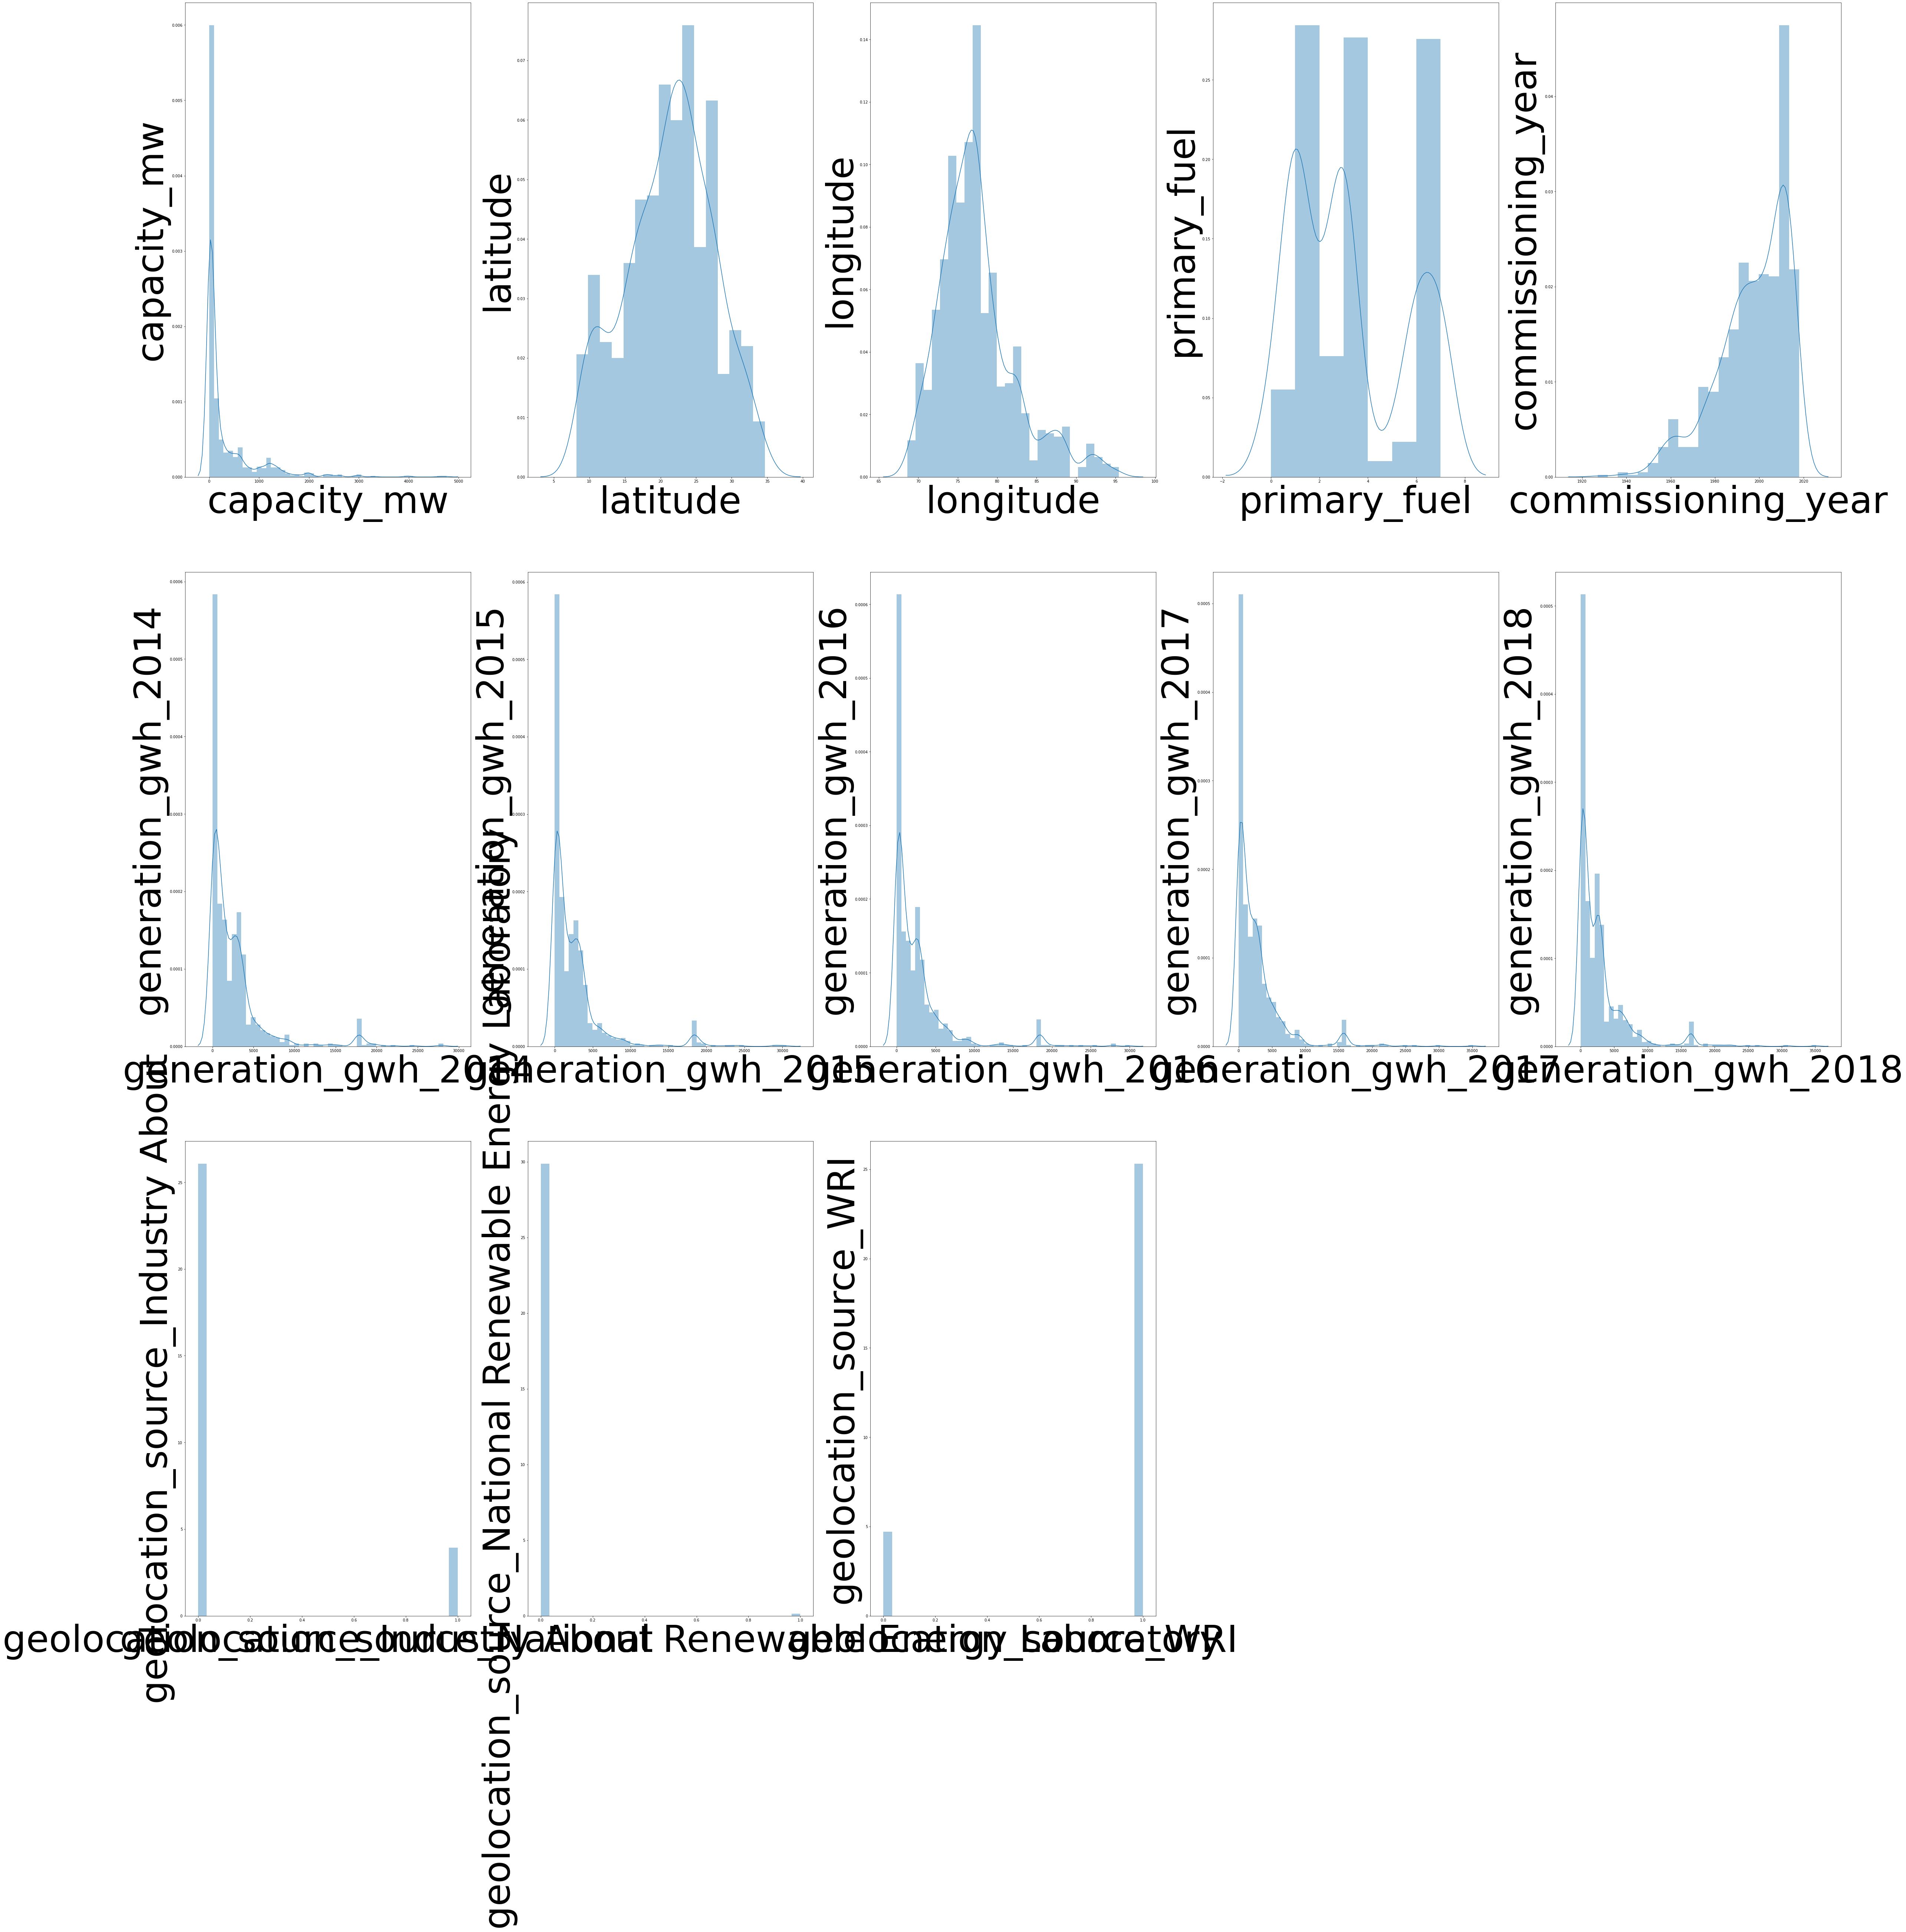

In [31]:
plt.figure(figsize=(80,80))
plotnumber=1
for column in data:
    if plotnumber<=15:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=100)
        plt.ylabel(column,fontsize=100)
    plotnumber+=1
plt.tight_layout()

In [32]:
#since their is skewness in data , so we can apply techniques to deal with data  .

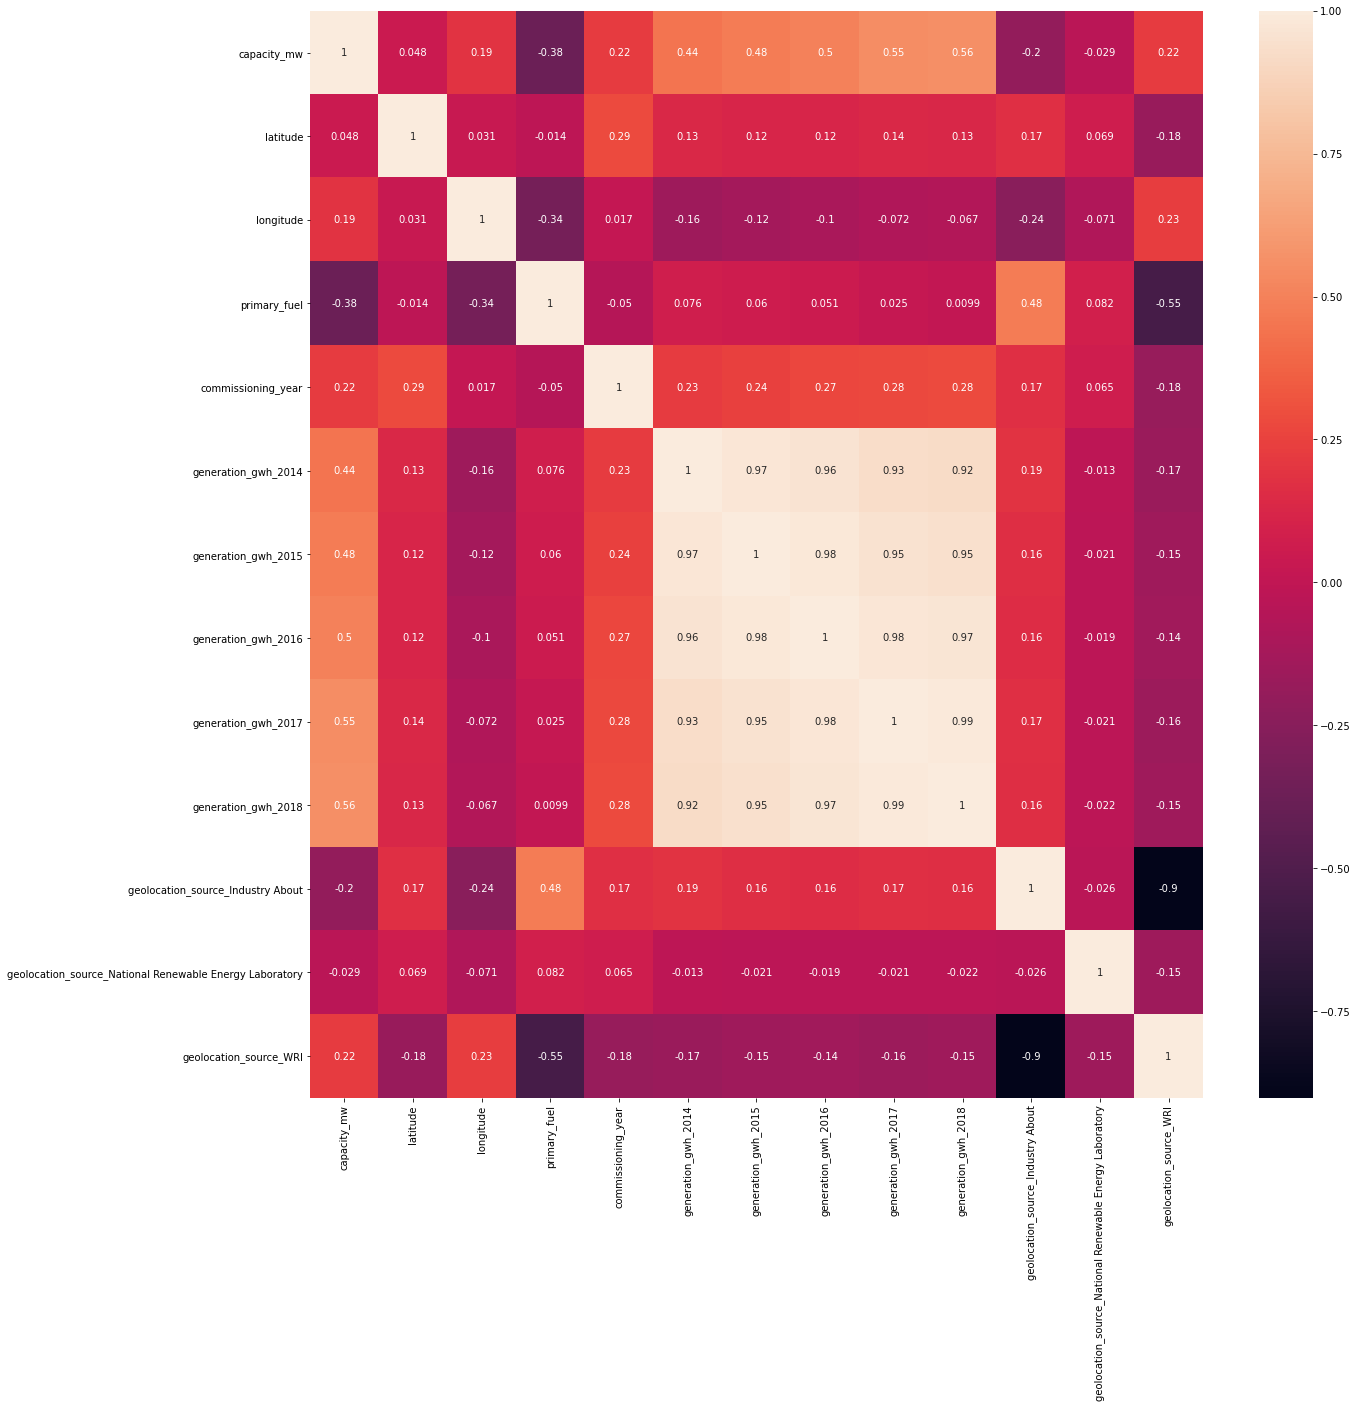

In [33]:
corr=data.corr()
corr.shape

plt.figure(figsize=(20,20))
sns.heatmap(corr,annot=True)
plt.show()

In [34]:
#generation_gwh2014-2018 ,generation_gwh2015-2018,generation_gwh2016-2018,generation_gwh2017-2018,generation_gwh2014-2015 are highly correlated
#generation_gwh2017-2014,generation_gwh2017-2015,generation_gwh2017-2016,generation_gwh2014-2016,generation_gwh2015-2016 are highly correlated

In [35]:
data.drop(columns=["generation_gwh_2016","generation_gwh_2018"],inplace=True)

data.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,generation_gwh_2014,generation_gwh_2015,generation_gwh_2017,geolocation_source_Industry About,geolocation_source_National Renewable Energy Laboratory,geolocation_source_WRI
0,2.5,28.1839,73.2407,6,2011.000000,576.547333,482.349333,529.008000,0,1,0
1,98.0,24.7663,74.6090,1,1976.333333,2531.734217,2836.214750,2815.537267,0,0,1
2,39.2,21.9038,69.3732,7,2009.333333,2420.079333,1942.164800,1644.988333,0,0,1
3,135.0,23.8712,91.3602,2,2004.000000,617.789264,843.747000,663.774500,0,0,1
4,1800.0,21.9603,82.4091,1,2015.000000,3035.550000,5916.370000,5385.579736,0,0,1


# lets start with regression model 

In [106]:
x=data
y=data.capacity_mw





In [107]:
from sklearn.feature_selection import SelectKBest,f_classif

best_features=SelectKBest(score_func=f_classif,k=9)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(9,"Scores_obtained"))

                         Column_names  Scores_obtained
0                         capacity_mw              inf
7                 generation_gwh_2017         3.216674
8   geolocation_source_Industry About         3.186517
3                        primary_fuel         3.093422
10             geolocation_source_WRI         2.894591
6                 generation_gwh_2015         2.752184
5                 generation_gwh_2014         2.687517
4                  commissioning_year         1.797367
2                           longitude         1.527616


In [108]:
data_final=data[["generation_gwh_2017","geolocation_source_Industry About","primary_fuel","geolocation_source_WRI",
               "generation_gwh_2015","generation_gwh_2014","commissioning_year","longitude","latitude"]]

In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [42]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(x,y)

LinearRegression()

In [43]:
y_pred=lm.predict(x_test)

In [44]:
lm.score(x_train,y_train)

0.46508425394654573

In [45]:
lm.score(x_test,y_test)

0.5832128585479932

In [46]:
from sklearn.model_selection import cross_val_score
cross_val_score(lm,x,y,cv=10).mean()

0.39828308945168384

In [47]:
#lets check on other algorithm

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
knr=KNeighborsRegressor()
knr.fit(x_train,y_train)

KNeighborsRegressor()

In [50]:
y_pred=knr.predict(x_test)


In [51]:
print("training accuracy:",knr.score(x_train,y_train))

training accuracy: 0.6480391688232953


In [52]:
print("Testing accuracy:",knr.score(x_test,y_test))

Testing accuracy: 0.6087808613071133


In [53]:
cross_val_score(knr,x,y,cv=10).mean()

0.45326504918750093

In [54]:
param_grid={"algorithm":["kd_tree","brute"],
           "leaf_size":[7,8,10,12,14],
           "n_neighbors":[6,7,11,14]}

In [55]:
from sklearn.model_selection import GridSearchCV
gridsearch=GridSearchCV(estimator=knr,param_grid=param_grid)

In [56]:
gridsearch.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [7, 8, 10, 12, 14],
                         'n_neighbors': [6, 7, 11, 14]})

In [57]:
gridsearch.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 6}

In [58]:
knr=KNeighborsRegressor(algorithm = 'kd_tree', leaf_size = 10, n_neighbors = 6)
knr.fit(x_train,y_train)

KNeighborsRegressor(algorithm='kd_tree', leaf_size=10, n_neighbors=6)

In [59]:
y_pred=knr.predict(x_test)

In [60]:
knr.score(x_train,y_train)

0.6133326285583296

In [61]:
knr.score(x_test,y_test)

0.5882963532529717

In [62]:
# check on other algorithms as well

In [63]:
from sklearn.tree import DecisionTreeRegressor

In [64]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [65]:
y_pred=dtr.predict(x_test)

In [66]:
print("training score",dtr.score(x_train,y_train))
print("testing score",dtr.score(x_test,y_test))

training score 0.9999436453489344
testing score 0.4909187747962467


In [67]:
cross_val_score(dtr,x,y,cv=8).mean()

0.5554070081775379

In [68]:
#lets do hyperparameter tuning so as to get more accuracy


In [69]:
param_grid={"max_depth":range(10,20),
           "min_samples_leaf":range(2,7),
           "min_samples_split":range(2,6)}

In [70]:
grid_search=GridSearchCV(estimator=dtr,param_grid=param_grid,cv=5,n_jobs=-1)

In [71]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(10, 20),
                         'min_samples_leaf': range(2, 7),
                         'min_samples_split': range(2, 6)})

In [72]:
grid_search.best_params_

{'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [73]:
dtr=DecisionTreeRegressor(max_depth = 12, min_samples_leaf = 2, min_samples_split = 2)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=12, min_samples_leaf=2)

In [74]:
y_pred=dtr.predict(x_test)

In [75]:
print("training score",dtr.score(x_train,y_train))
print("testing score",dtr.score(x_test,y_test))

training score 0.9544284061483357
testing score 0.425980345128423


In [76]:
#hence accuracy increased by 1 %

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
rfr= RandomForestRegressor()

rfr.fit(x_train,y_train)

RandomForestRegressor()

In [79]:
y_pred=rfr.predict(x_test)

In [80]:
cross_val_score(rfr,x,y,cv=8).mean()

0.7579821435001839

In [81]:
rfr.score(x_train,y_train)

0.9658956667098068

In [82]:
rfr.score(x_test,y_test)

0.7223036642887345

In [83]:
#hence the data is not overfitting which s good .lets do hypertuning now

In [84]:
param_grid={"max_depth":range(2,4),
           "min_samples_leaf":range(2,4),
           "min_samples_split":range(4,6)
           }

In [85]:
grid_search=GridSearchCV(rfr,param_grid=param_grid)

grid_search.fit(x_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(2, 4),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(4, 6)})

In [86]:
grid_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [87]:
rfr= RandomForestRegressor(max_depth= 3, min_samples_leaf=2, min_samples_split= 5)

rfr.fit(x_train,y_train)
y_pred=rfr.predict(x_test)

print("training score",dtr.score(x_train,y_train))
print("testing score",dtr.score(x_test,y_test))

training score 0.9544284061483357
testing score 0.425980345128423


In [88]:
from sklearn.ensemble import AdaBoostRegressor

In [89]:
ada=AdaBoostRegressor()

ada.fit(x_train,y_train)

AdaBoostRegressor()

In [90]:
y__preds=ada.predict(x_test)

In [91]:
print("training score",ada.score(x_train,y_train))
print("testing score",ada.score(x_test,y_test))

training score 0.6337913865598404
testing score 0.573124470229861


In [92]:
from sklearn.model_selection import RandomizedSearchCV

In [93]:
params={'n_estimators':[40,45,50,55,60],
       'learning_rate':[0.25,0.30,0.35,0.40]}

In [94]:
rnd=RandomizedSearchCV(ada,cv=5,param_distributions=params)
rnd.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=AdaBoostRegressor(),
                   param_distributions={'learning_rate': [0.25, 0.3, 0.35, 0.4],
                                        'n_estimators': [40, 45, 50, 55, 60]})

In [95]:
rnd.best_params_

{'n_estimators': 40, 'learning_rate': 0.25}

In [96]:
ada=AdaBoostRegressor(n_estimators= 45, learning_rate= 0.25)

In [97]:
ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.25, n_estimators=45)

In [98]:
y_pred=ada.predict(x_test)

In [99]:
ada.score(x_test,y_test)

0.6671309964577188

In [100]:
from sklearn.ensemble import GradientBoostingRegressor

In [101]:
xbdt=GradientBoostingRegressor()

In [102]:
xbdt.fit(x_train,y_train)

GradientBoostingRegressor()

In [103]:
y_preed=xbdt.predict(x_test)

In [104]:
print("Training data:",xbdt.score(x_train,y_train))
print("Testing data:",xbdt.score(x_test,y_test))

Training data: 0.9234791234631248
Testing data: 0.7690451940157611


In [105]:
# Hence an accuracy of 76.9% is also achieved.

In [189]:
import pickle
final_model="capacity_mw.pickle"
pickle.dump(xbdt,open(final_model,'wb'))

# Lets do classification now

In [109]:
x=data
y=data.primary_fuel

In [110]:
from sklearn.feature_selection import SelectKBest,f_classif

best_features=SelectKBest(score_func=f_classif,k=9)
fit=best_features.fit(x,y)
df_scores=pd.DataFrame(fit.scores_)
df_columns=pd.DataFrame(x.columns)
feature_scores=pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns=["Column_names","Scores_obtained"]
print(feature_scores.nlargest(9,"Scores_obtained"))

                         Column_names  Scores_obtained
3                        primary_fuel              inf
8   geolocation_source_Industry About      1642.880375
10             geolocation_source_WRI      1039.440726
0                         capacity_mw        54.854670
4                  commissioning_year        27.435341
2                           longitude        27.354587
7                 generation_gwh_2017        24.117142
5                 generation_gwh_2014        19.289329
6                 generation_gwh_2015        18.335266


In [112]:
data_final=data[["geolocation_source_Industry About","geolocation_source_WRI","capacity_mw",
                "commissioning_year","longitude","generation_gwh_2017","generation_gwh_2014","generation_gwh_2015"]]

In [118]:
x=data_final
y=data.primary_fuel

In [119]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=41)

In [120]:
import six
import joblib
import sys
sys.modules['sklearn.externals.six']=six
sys.modules['sklearn.externals.joblib']=joblib

In [124]:
from imblearn.over_sampling import SMOTE
from collections import Counter

In [128]:
oversample = SMOTE()
x,y = oversample.fit_resample(x, y)

In [130]:
y.value_counts() # Hence target variable has balanced data , so their is equal opportunity to learn . 

7    258
5    258
3    258
1    258
6    258
4    258
2    258
0    258
Name: primary_fuel, dtype: int64

In [131]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

In [132]:
from time import time 
knn=KNeighborsClassifier()
start=time()
knn.fit(x_train,y_train)
print("Training Time :",time()-start)

start=time()
y_pred=knn.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 0.15201354026794434
Testing Time: 0.4000511169433594


In [133]:
cfm=confusion_matrix(y_test,y_pred)
cfm

array([[ 7,  1,  0,  1,  0,  0,  0,  3],
       [ 1, 47,  6,  9,  0,  1,  3,  6],
       [ 1,  6,  2,  3,  0,  1,  2,  2],
       [ 2,  8,  6, 39,  0,  1,  0,  4],
       [ 0,  2,  0,  0,  0,  0,  0,  0],
       [ 1,  2,  4,  1,  0,  0,  0,  1],
       [ 4,  5,  0,  4,  0,  0,  8,  3],
       [ 2,  1,  2,  1,  0,  0,  6, 18]], dtype=int64)

In [134]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.39      0.58      0.47        12
           1       0.65      0.64      0.65        73
           2       0.10      0.12      0.11        17
           3       0.67      0.65      0.66        60
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       0.42      0.33      0.37        24
           7       0.49      0.60      0.54        30

    accuracy                           0.53       227
   macro avg       0.34      0.37      0.35       227
weighted avg       0.52      0.53      0.53       227



In [137]:
cross_val_score(knn,x,y,cv=10).mean()

0.7078678298391257

In [138]:
# Hence the model is underfitting , probably not th ebest algorihm for the data , lets check on other algorithms as well .

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [140]:
start=time()
dt.fit(x_train,y_train)
print("Training Time :",time()-start)

start=time()
y_pred=dt.predict(x_test)
print("Testing Time:",time()-start)

Training Time : 0.5280766487121582
Testing Time: 0.023990631103515625


In [141]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.55      0.50      0.52        12
           1       0.75      0.79      0.77        73
           2       0.47      0.41      0.44        17
           3       0.69      0.62      0.65        60
           4       0.00      0.00      0.00         2
           5       0.75      0.33      0.46         9
           6       1.00      1.00      1.00        24
           7       0.59      0.77      0.67        30

    accuracy                           0.70       227
   macro avg       0.60      0.55      0.56       227
weighted avg       0.70      0.70      0.69       227



In [181]:
print(cross_val_score(dt,x,y,cv=5).mean())

from sklearn.ensemble import BaggingClassifier
bag_cls=BaggingClassifier(dt,n_estimators=6,max_samples=0.6,bootstrap=True,random_state=4,oob_score=True)

bag_cls.fit(x_train,y_train)
bag_cls.score(x_test,y_test)

0.8202661087472671


0.7180616740088106

In [143]:
# Hence the model is probably not th ebest algorihm for the data since i underfits the training data , lets check on other algorithms as well .

In [144]:
from sklearn.ensemble import AdaBoostClassifier
ada=AdaBoostClassifier()

In [147]:
start=time()
ada.fit(x_train,y_train)
print("Training time :",time()-start)

start=time()
y_pred=ada.predict(x_test)
print("Testing time :",time()-start)

Training time : 0.37716221809387207
Testing time : 0.03125762939453125


In [148]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.64      0.73      0.68        73
           2       0.00      0.00      0.00        17
           3       0.37      0.72      0.49        60
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         9
           6       1.00      0.96      0.98        24
           7       0.75      0.10      0.18        30

    accuracy                           0.54       227
   macro avg       0.34      0.31      0.29       227
weighted avg       0.51      0.54      0.47       227



In [150]:
cross_val_score(ada,x,y,cv=5).mean() # a clear case of data overfitting 

0.2742318813324244

In [151]:
from sklearn.ensemble import GradientBoostingClassifier


In [152]:
gbdt_cl=GradientBoostingClassifier()
gbdt_cl.fit(x_train,y_train)

GradientBoostingClassifier()

In [153]:
ypred_=gbdt_cl.predict(x_test)

In [155]:
print(classification_report(y_test,ypred_))

              precision    recall  f1-score   support

           0       0.38      0.42      0.40        12
           1       0.77      0.84      0.80        73
           2       0.60      0.53      0.56        17
           3       0.83      0.82      0.82        60
           4       0.33      0.50      0.40         2
           5       0.67      0.22      0.33         9
           6       1.00      1.00      1.00        24
           7       0.77      0.80      0.79        30

    accuracy                           0.77       227
   macro avg       0.67      0.64      0.64       227
weighted avg       0.77      0.77      0.77       227



In [156]:
cross_val_score(gbdt_cl,x,y,cv=10)

array([0.78743961, 0.82608696, 0.82608696, 0.85990338, 0.92718447,
       0.8592233 , 0.8592233 , 0.87378641, 0.85436893, 0.86407767])

In [157]:
# lets do hyperparameter tunng now 

In [158]:
from sklearn.ensemble import BaggingClassifier

In [163]:
bag_cls=BaggingClassifier(gbdt_cl,n_estimators=6,max_samples=0.6,bootstrap=True,random_state=4,oob_score=True)

In [164]:
bag_cls.fit(x_train,y_train)

BaggingClassifier(base_estimator=GradientBoostingClassifier(), max_samples=0.6,
                  n_estimators=6, oob_score=True, random_state=4)

In [165]:
bag_cls.score(x_test,y_test)

0.748898678414097

In [172]:
param_grid={"max_depth": range(10,12),
           "min_samples_leaf": range(2,4),
           "min_samples_split": range(3,6)}

In [173]:
gridsearch=GridSearchCV(estimator=gbdt_cl,param_grid=param_grid,cv=5,n_jobs=-1)

In [174]:
gridsearch.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 12),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(3, 6)})

In [175]:
gridsearch.best_params_

{'max_depth': 11, 'min_samples_leaf': 2, 'min_samples_split': 5}

In [176]:
gbdt_cl=GradientBoostingClassifier(max_depth= 11, min_samples_leaf= 2, min_samples_split= 5)
gbdt_cl.fit(x_train,y_train)

ypred_=gbdt_cl.predict(x_test)

In [186]:
print(confusion_matrix(y_test,y_pred))

[[ 0  0  0 12  0  0  0  0]
 [ 0 53  0 20  0  0  0  0]
 [ 0  9  0  7  1  0  0  0]
 [ 0 17  0 43  0  0  0  0]
 [ 0  2  0  0  0  0  0  0]
 [ 0  1  0  8  0  0  0  0]
 [ 0  0  0  0  0  0 23  1]
 [ 0  1  0 26  0  0  0  3]]


In [179]:
print(classification_report(y_test,ypred_))

              precision    recall  f1-score   support

           0       0.38      0.50      0.43        12
           1       0.85      0.86      0.86        73
           2       0.50      0.53      0.51        17
           3       0.80      0.80      0.80        60
           4       1.00      0.50      0.67         2
           5       0.67      0.22      0.33         9
           6       1.00      1.00      1.00        24
           7       0.74      0.77      0.75        30

    accuracy                           0.78       227
   macro avg       0.74      0.65      0.67       227
weighted avg       0.78      0.78      0.77       227



In [180]:
#Hence a good accuracy of 78% has been achieved .

In [187]:
#gaving checked on 5 algorithms best model is GradientBoostingClassifier .

In [188]:
import pickle
final_model="fuel.pickle"
pickle.dump(gbdt_cl,open(final_model,'wb'))